In [16]:
from sweeping import Sweeper
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
sweeper = Sweeper.from_jsonfile("config.json")

In [18]:
sweeper.config_df

,dataset,attack,norm,model,binary_search_steps,loss_f,steps,α_final,α_init,γ_final,γ_init,max_eps,n_iter,num_steps,threat_norm
0,CIFAR10,alma,L1,Augustin2020Adversarial_34_10_extra,<NA>,DL,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,100,L2
1,CIFAR10,alma,L1,Augustin2020Adversarial_34_10_extra,<NA>,DL,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1000,L2
2,CIFAR10,alma,L1,Engstrom2019Robustness,<NA>,DL,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,100,L2
3,CIFAR10,alma,L1,Engstrom2019Robustness,<NA>,DL,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,100,Linf
4,CIFAR10,alma,L1,Engstrom2019Robustness,<NA>,DL,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1000,L2
5,CIFAR10,alma,L1,Engstrom2019Robustness,<NA>,DL,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1000,Linf
6,CIFAR10,alma,L2,Engstrom2019Robustness,<NA>,DL,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,100,<NA>
7,CIFAR10,alma,L2,Engstrom2019Robustness,<NA>,DL,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1000,<NA>
8,CIFAR10,alma,L2,Rade2021Helper_R18_ddpm,<NA>,DL,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,100,<NA>
9,CIFAR10,alma,L2,Rade2021Helper_R18_ddpm,<NA>,DL,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1000,<NA>


In [19]:
sweeper.logger.load_all()

In [20]:
sweeper.sweep(n_samples=60, recompute=False)
sweeper.save_df()

dataset                                    CIFAR10
attack                                        alma
norm                                            L1
model          Augustin2020Adversarial_34_10_extra
loss_f                                          DL
num_steps                                      100
threat_norm                                     L2
Name: 0, dtype: object
Files already downloaded and verified


  0%|          | 0/3 [00:03<?, ?it/s]


KeyboardInterrupt: 

In [21]:
sweeper.logger.where(attack="apgd")

{'dataset-CIFAR10-attack-apgd-norm-Linf-model-Rade2021Helper_R18_extra-binary_search_steps-10-loss_f-DL-max_eps-0.032-n_iter-100': {'norm_progress': array([[3.2000005e-02, 3.2000005e-02, 3.1999975e-02, ..., 3.1999998e-02,
          3.2000005e-02, 3.2000005e-02],
         [3.2000005e-02, 3.2000005e-02, 3.2000005e-02, ..., 3.2000005e-02,
          3.2000005e-02, 3.2000005e-02],
         [3.2000005e-02, 3.2000005e-02, 3.2000005e-02, ..., 3.2000005e-02,
          3.2000005e-02, 3.2000005e-02],
         ...,
         [6.2525272e-05, 2.1812528e-02, 6.3937515e-02, ..., 6.3937515e-02,
          3.2312512e-02, 5.5687517e-02],
         [6.2525272e-05, 2.1812528e-02, 6.3937515e-02, ..., 6.3937515e-02,
          3.2312512e-02, 5.5687517e-02],
         [6.2525272e-05, 2.1812528e-02, 0.0000000e+00, ..., 0.0000000e+00,
          0.0000000e+00, 5.5687517e-02]], dtype=float32),
  'acc_progress': array([[0., 1., 1., ..., 1., 1., 1.],
         [0., 1., 1., ..., 1., 1., 1.],
         [0., 0., 1., ..., 1.,

In [22]:
settings = {"attack":"", "model":"", "norm":"L1"}

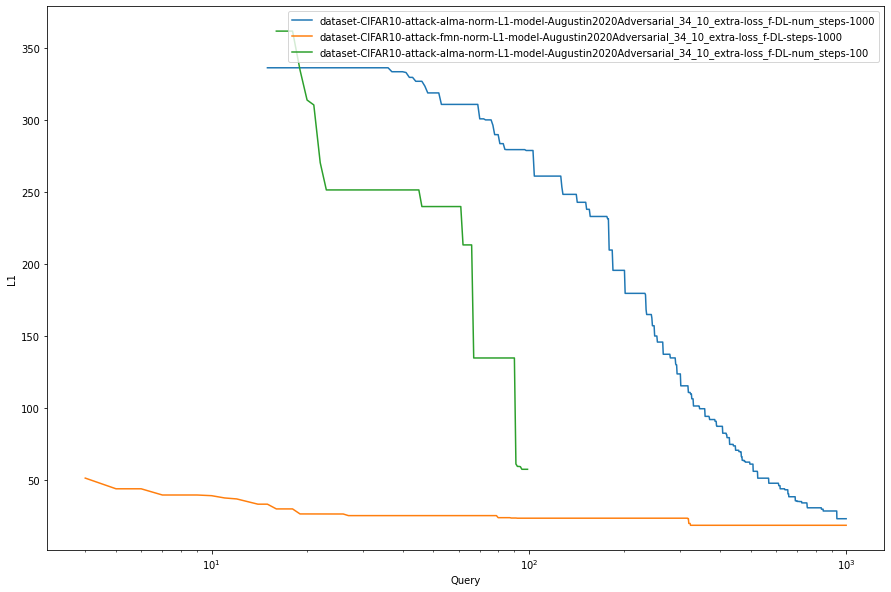

In [23]:
import matplotlib.pyplot as plt

# todo - put this into functions in some plot_utils file
# todo - support some agregation by keywords of a dict (add abstraction)
# tofo - support filtering/splitting into multiple plots (e.g. plot only one model)

plt.figure(figsize=(15,10))
keys = []
for key in sweeper.logger.where(**settings):
    sweeper.logger.plot_QD(key)
    keys.append(key)
plt.legend(keys)#, bbox_to_anchor =(0.65, 1.25))
plt.ylabel(settings["norm"])
plt.xlabel("Query")
plt.xscale('log')
None

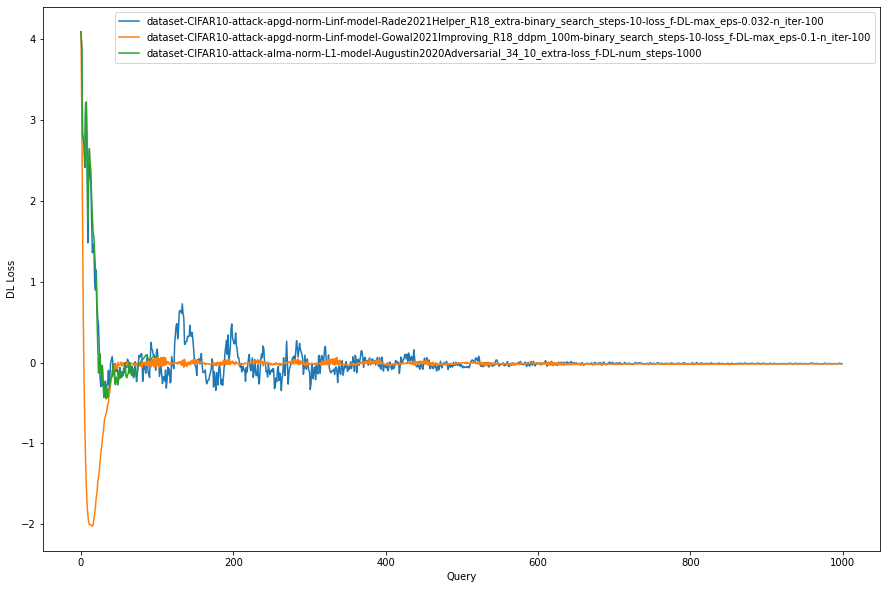

In [24]:
plt.figure(figsize=(15,10))
for key in sweeper.logger.where(**settings):
    sweeper.logger.plot_progress(kind="loss", run_id=key)
plt.legend([*sweeper.logger.dict.keys()])#, bbox_to_anchor =(0.65, 1.25))
plt.ylabel("DL Loss")
plt.xlabel("Query")
None

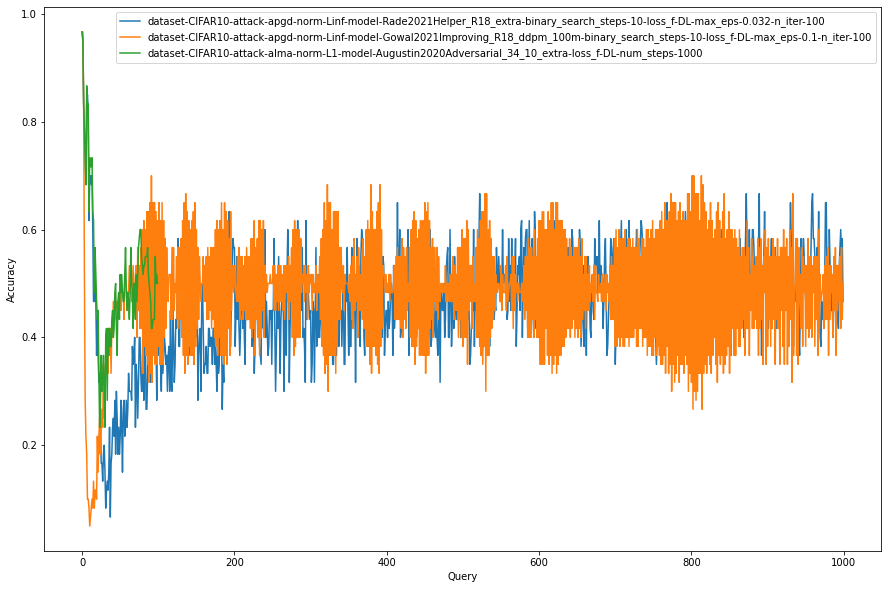

In [25]:
plt.figure(figsize=(15,10))
for key in sweeper.logger.where(**settings):
    sweeper.logger.plot_progress(kind="acc", run_id=key)
plt.legend([*sweeper.logger.dict.keys()])#, bbox_to_anchor =(0.65, 1.25))
plt.ylabel("Accuracy")
plt.xlabel("Query")
None